In [1]:
# Initial imports
import pandas as pd
import numpy as np
from path import Path
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Set a random seed for TensorFlow to allow reproducible testing results
tf.random.set_seed(7)

In [3]:
# Read in data
file_path = Path("Resources/clean_data_v.csv")
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,color_D,color_E,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,...,1,0,0,0,1,0,0,0,0,0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# Rename columns
df = df.rename(columns={"depth": "total depth percentage", "x": "length", "y":"width", "z": "depth"})

In [5]:
# Drop unnecessary column
df = df.drop(columns=["Unnamed: 0"])
df.columns

Index(['carat', 'total depth percentage', 'table', 'price', 'length', 'width',
       'depth', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [6]:
# Create the features set (X) and the target set (y)
X = df.drop(columns=["price"]).values
y = df["price"].values

In [7]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=7)

In [8]:
# Scale the data of the features set using the StandardScaler

X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create a shallow, 1 hidden layer, neural network

# Define the model
number_inputs = 26
number_hidden_nodes = 16

nn_1 = Sequential()
nn_1.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))

# Output layer
number_classes = 1

nn_1.add(Dense(units=number_classes, activation="linear"))

In [10]:
nn_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                432       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile model
nn_1.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_1= nn_1.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1130/1130 [==============================] - 4s 4ms/step - loss: 31038818.0000 - mean_absolute_error: 3908.1763
Epoch 2/125
1130/1130 [==============================] - 4s 4ms/step - loss: 28667864.0000 - mean_absolute_error: 3754.7620
Epoch 3/125
1130/1130 [==============================] - 3s 3ms/step - loss: 24622158.0000 - mean_absolute_error: 3475.8269A: 1s - loss: 26011910.0000
Epoch 4/125
1130/1130 [==============================] - 4s 3ms/step - loss: 20066056.0000 - mean_absolute_error: 3121.8848
Epoch 5/125
1130/1130 [==============================] - 4s 3ms/step - loss: 15676028.0000 - mean_absolute_error: 2730.5093
Epoch 6/125
1130/1130 [==============================] - 4s 4ms/step - loss: 11887609.0000 - mean_absolute_error: 2345.6077
Epoch 7/125
1130/1130 [==============================] - 3s 3ms/step - loss: 8912262.0000 - mean_absolute_error: 2019.1405
Epoch 8/125
1130/1130 [==============================] - 3s 3ms/step - loss: 6745085.5000 - mean_absolute_

In [12]:
predicted_1 = nn_1.predict(X_test_scaled)
print(predicted_1.reshape(1,-1)[0])

[ 929.14996 3952.7437  3170.9805  ... 4111.196   5233.412   7482.1274 ]


In [13]:
model_1_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_1.reshape(1,-1)[0] })
model_1_results_df

,y_test,y_pred
0,1110,929.149963
1,4796,3952.743652
2,3619,3170.980469
3,8545,7907.285156
4,732,575.411743
...,...,...
17796,1040,1014.713745
17797,2688,2122.761719
17798,3726,4111.195801
17799,5306,5233.412109


In [14]:
model_1_results_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,3920.494385
std,3974.906564,3915.587402
min,327.000000,62.516823
25%,942.000000,912.947083
50%,2389.000000,2350.772705
75%,5392.000000,5651.768066
max,18806.000000,26699.933594


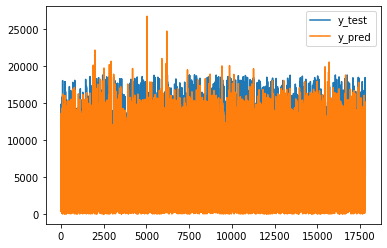

In [15]:
model_1_results_df.plot()

In [16]:
# Create a neural network with 2 hidden layers with 16 hidden nodes each
# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16

nn_2 = Sequential()

# First hidden layer
nn_2.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn_2.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_2.add(Dense(units=1, activation="linear"))

In [17]:
# Compile model
nn_2.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_2 = nn_2.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1130/1130 [==============================] - 3s 2ms/step - loss: 24726518.0000 - mean_absolute_error: 3430.3445A: 1s - loss: 29807912.0000 - mean_absolute_error: 3837.058 - ETA: 1s - loss: 29965950.0000 - mean_ab
Epoch 2/125
1130/1130 [==============================] - 3s 2ms/step - loss: 5072912.5000 - mean_absolute_error: 1470.9597
Epoch 3/125
1130/1130 [==============================] - 3s 2ms/step - loss: 1917631.8750 - mean_absolute_error: 890.6136
Epoch 4/125
1130/1130 [==============================] - 2s 2ms/step - loss: 1308571.1250 - mean_absolute_error: 702.3356
Epoch 5/125
1130/1130 [==============================] - 2s 2ms/step - loss: 1148388.7500 - mean_absolute_error: 652.9992
Epoch 6/125
1130/1130 [==============================] - 2s 2ms/step - loss: 1089858.6250 - mean_absolute_error: 633.2716
Epoch 7/125
1130/1130 [==============================] - 2s 2ms/step - loss: 1048384.9375 - mean_absolute_error: 614.4673
Epoch 8/125
1130/1130 [===================

In [18]:
predicted_2 = nn_2.predict(X_test_scaled)
print(predicted_2.reshape(1,-1)[0])

[1175.9008 3925.1626 3475.6243 ... 3960.1519 5149.4883 7068.107 ]


In [19]:
model_2_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_2.reshape(1,-1)[0] })

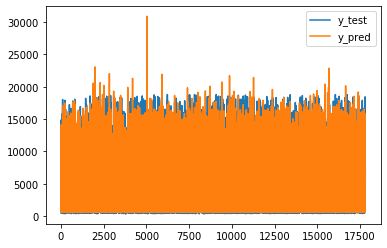

In [20]:
model_2_results_df.plot()

In [21]:
model_2_results_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,3945.481689
std,3974.906564,3938.210938
min,327.000000,463.928345
25%,942.000000,919.452637
50%,2389.000000,2427.448242
75%,5392.000000,5369.204102
max,18806.000000,30900.904297


In [22]:
model_2_results_df.sum()

Total_delta = (model_2_results_df.sum()[1] - model_2_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_2_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_2_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_2_results_df.sum()[1],",.0f"))

Total delta is $ 277,907
Delta as % of total price is 0.40%
Total price of all diamonds in the test sample is 69,954,836
Total predicted price of all diamonds is 70,232,743


In [23]:
# Create a neural network with 3 hidden layers with 16 hidden nodes each
# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_3 = Sequential()

# First hidden layer
nn_3.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn_3.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_3.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_3.add(Dense(units=1, activation="linear"))

In [24]:
# Compile model
nn_3.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_3 = nn_3.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1130/1130 [==============================] - 4s 3ms/step - loss: 13280728.0000 - mean_absolute_error: 2128.8743
Epoch 2/125
1130/1130 [==============================] - 3s 2ms/step - loss: 1124880.8750 - mean_absolute_error: 602.8928
Epoch 3/125
1130/1130 [==============================] - 2s 2ms/step - loss: 978528.0625 - mean_absolute_error: 568.5730
Epoch 4/125
1130/1130 [==============================] - 3s 3ms/step - loss: 901577.2500 - mean_absolute_error: 535.8672: 0s - loss: 711156.9375 - mean_absolu - ETA: 0s - loss: 856
Epoch 5/125
1130/1130 [==============================] - 4s 3ms/step - loss: 842706.8750 - mean_absolute_error: 504.1538
Epoch 6/125
1130/1130 [==============================] - 3s 3ms/step - loss: 798184.7500 - mean_absolute_error: 478.2579: 1s - loss: 747661.9375 - mean_absolu - ETA: 0s - loss: 719575.0625 - mean_ab
Epoch 7/125
1130/1130 [==============================] - 3s 3ms/step - loss: 756172.7500 - mean_absolute_error: 455.0240
Epoch 8/125

In [25]:
predicted_3 = nn_3.predict(X_test_scaled)
print(predicted_3.reshape(1,-1)[0])

[1250.3379 3844.2166 3449.2053 ... 3803.6853 5207.7676 7189.674 ]


In [26]:
model_3_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_3.reshape(1,-1)[0] })

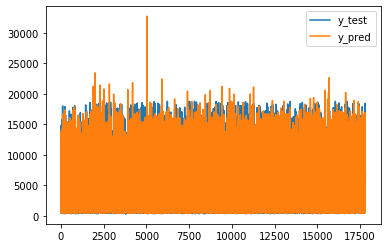

In [27]:
model_3_results_df.plot()

In [28]:
model_3_results_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,3961.058350
std,3974.906564,3962.476807
min,327.000000,372.522339
25%,942.000000,940.002441
50%,2389.000000,2455.333496
75%,5392.000000,5423.148926
max,18806.000000,32739.080078


In [29]:
model_3_results_df.sum()

Total_delta = (model_3_results_df.sum()[1] - model_3_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_3_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_3_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_3_results_df.sum()[1],",.0f"))

Total delta is $ 555,852
Delta as % of total price is 0.79%
Total price of all diamonds in the test sample is 69,954,836
Total predicted price of all diamonds is 70,510,688


In [30]:
# Create a neural network with 4 hidden layers with 16 hidden nodes each

# Define the model - deep neural net
number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16
hidden_nodes_layer4 =16

nn_4 = Sequential()

# First hidden layer
nn_4.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn_4.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_4.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Fourth hidden layer
nn_4.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_4.add(Dense(units=1, activation="linear"))

In [31]:
# Compile model
nn_4.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_4 = nn_4.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1130/1130 [==============================] - 3s 2ms/step - loss: 6921968.5000 - mean_absolute_error: 1300.0635
Epoch 2/125
1130/1130 [==============================] - 2s 2ms/step - loss: 983199.5000 - mean_absolute_error: 517.0397
Epoch 3/125
1130/1130 [==============================] - 3s 2ms/step - loss: 869198.2500 - mean_absolute_error: 467.9370
Epoch 4/125
1130/1130 [==============================] - 2s 2ms/step - loss: 788782.2500 - mean_absolute_error: 443.6871
Epoch 5/125
1130/1130 [==============================] - 2s 2ms/step - loss: 731996.0000 - mean_absolute_error: 424.7969
Epoch 6/125
1130/1130 [==============================] - 2s 2ms/step - loss: 696345.0000 - mean_absolute_error: 413.5540
Epoch 7/125
1130/1130 [==============================] - 2s 2ms/step - loss: 657678.3125 - mean_absolute_error: 404.8277
Epoch 8/125
1130/1130 [==============================] - 2s 1ms/step - loss: 623213.0000 - mean_absolute_error: 396.9040
Epoch 9/125
1130/1130 [=======

In [32]:
predicted_4 = nn_4.predict(X_test_scaled)
print(predicted_4.reshape(1,-1)[0])

[1146.0853 4081.89   3429.4578 ... 3887.3416 5214.6406 7181.1533]


In [33]:
model_4_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_4.reshape(1,-1)[0] })

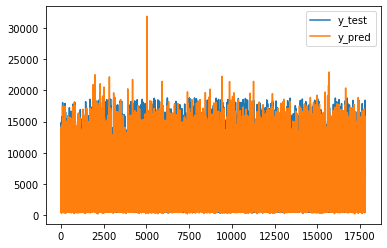

In [34]:
model_4_results_df.plot()

In [35]:
model_4_results_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,3955.998779
std,3974.906564,3961.417725
min,327.000000,151.854919
25%,942.000000,924.099487
50%,2389.000000,2459.216064
75%,5392.000000,5435.349609
max,18806.000000,31934.474609


In [36]:
model_4_results_df.sum()

Total_delta = (model_4_results_df.sum()[1] - model_4_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_4_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_4_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_4_results_df.sum()[1],",.0f"))

Total delta is $ 466,183
Delta as % of total price is 0.67%
Total price of all diamonds in the test sample is 69,954,836
Total predicted price of all diamonds is 70,421,019


In [37]:
# Create neural net with 3 hidden layers with sigmoid activation for each hidden layer

# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_5 = Sequential()

# First hidden layer
nn_5.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)
# Second hidden layer
nn_5.add(Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn_5.add(Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn_5.add(Dense(units=1, activation="linear"))

In [38]:
# Compile the model
nn_5.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_5 = nn_5.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31390738.0000 - mean_absolute_error: 3926.6367
Epoch 2/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31251414.0000 - mean_absolute_error: 3908.8054
Epoch 3/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31094562.0000 - mean_absolute_error: 3888.6895
Epoch 4/10
1130/1130 [==============================] - 2s 2ms/step - loss: 30952950.0000 - mean_absolute_error: 3870.4243
Epoch 5/10
1130/1130 [==============================] - 2s 2ms/step - loss: 30815042.0000 - mean_absolute_error: 3852.5432
Epoch 6/10
1130/1130 [==============================] - 2s 2ms/step - loss: 30678664.0000 - mean_absolute_error: 3834.8191
Epoch 7/10
1130/1130 [==============================] - 2s 2ms/step - loss: 30543012.0000 - mean_absolute_error: 3817.0867
Epoch 8/10
1130/1130 [==============================] - 2s 2ms/step - loss: 30407900.0000 - mean_absolute_error: 3799.4197
Epoch 9/10
1130/

In [39]:
predicted_5 = nn_5.predict(X_test_scaled)
print(predicted_5.reshape(1,-1)[0])

[181.58173 181.58179 181.58176 ... 181.58176 181.58176 181.58177]


In [40]:
model_5_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_5.reshape(1,-1)[0] })

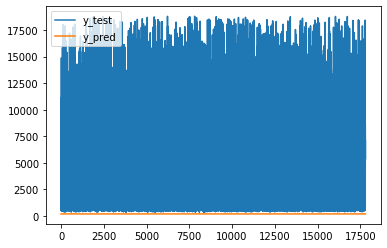

In [41]:
model_5_results_df.plot()

In [42]:
model_5_results_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,181.564697
std,3974.906564,0.017044
min,327.000000,181.581528
25%,942.000000,181.581726
50%,2389.000000,181.581741
75%,5392.000000,181.581757
max,18806.000000,181.581802


In [43]:
model_5_results_df.sum()

Total_delta = (model_5_results_df.sum()[1] - model_5_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_5_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_5_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_5_results_df.sum()[1],",.0f"))

Total delta is $ -66,722,499
Delta as % of total price is -95.38%
Total price of all diamonds in the test sample is 69,954,836
Total predicted price of all diamonds is 3,232,337


In [44]:
# Neural network with 3 hidden layer that use tanh activation function at each hidden layer

# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_6 = Sequential()

# First hidden layer
nn_6.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)
# Second hidden layer
nn_6.add(Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_6.add(Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn_6.add(Dense(units=1, activation="linear"))

In [45]:
# Compile the model
nn_6.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_6 = nn_6.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31329052.0000 - mean_absolute_error: 3919.2402
Epoch 2/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31167590.0000 - mean_absolute_error: 3898.0647
Epoch 3/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31019632.0000 - mean_absolute_error: 3879.0483
Epoch 4/10
1130/1130 [==============================] - 2s 2ms/step - loss: 30873518.0000 - mean_absolute_error: 3860.1484
Epoch 5/10
1130/1130 [==============================] - 2s 2ms/step - loss: 30728490.0000 - mean_absolute_error: 3841.2942
Epoch 6/10
1130/1130 [==============================] - 2s 2ms/step - loss: 30584404.0000 - mean_absolute_error: 3822.5120
Epoch 7/10
1130/1130 [==============================] - 2s 2ms/step - loss: 30440910.0000 - mean_absolute_error: 3803.6943
Epoch 8/10
1130/1130 [==============================] - 2s 2ms/step - loss: 30297996.0000 - mean_absolute_error: 3784.9348A: 1s - loss: 297

In [46]:
predicted_6 = nn_6.predict(X_test_scaled)
print(predicted_6.reshape(1,-1)[0])

[196.374   196.37401 196.37401 ... 196.37393 196.37401 196.37401]


In [47]:
model_6_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_6.reshape(1,-1)[0] })

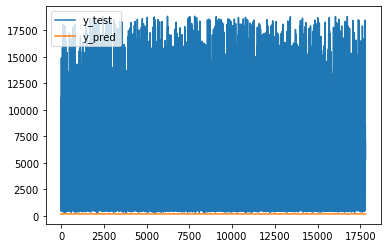

In [48]:
model_6_results_df.plot()

In [49]:
model_6_results_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,196.324982
std,3974.906564,0.049006
min,327.000000,196.373489
25%,942.000000,196.373978
50%,2389.000000,196.374008
75%,5392.000000,196.374008
max,18806.000000,196.374008


In [50]:
model_6_results_df.sum()

Total_delta = (model_6_results_df.sum()[1] - model_6_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_6_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_6_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_6_results_df.sum()[1],",.0f"))

Total delta is $ -66,459,183
Delta as % of total price is -95.00%
Total price of all diamonds in the test sample is 69,954,836
Total predicted price of all diamonds is 3,495,653


In [51]:
# Create neural network with 3 hidden layer with softmax activation function for each hidden layer 
# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_7 = Sequential()

# First hidden layer
nn_7.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="softmax")
)
# Second hidden layer
nn_7.add(Dense(units=hidden_nodes_layer2, activation="softmax"))

# Third hidden layer
nn_7.add(Dense(units=hidden_nodes_layer2, activation="softmax"))

# Output layer
nn_7.add(Dense(units=1, activation="linear"))

In [52]:
# Compile the model
nn_7.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_7 = nn_7.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31438710.0000 - mean_absolute_error: 3932.7073A: 0s - loss: 31343080.0000 - mean_absolute_error: 3926
Epoch 2/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31414628.0000 - mean_absolute_error: 3929.6321
Epoch 3/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31393912.0000 - mean_absolute_error: 3926.9934
Epoch 4/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31375654.0000 - mean_absolute_error: 3924.6650
Epoch 5/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31357962.0000 - mean_absolute_error: 3922.4116
Epoch 6/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31340466.0000 - mean_absolute_error: 3920.1824
Epoch 7/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31323010.0000 - mean_absolute_error: 3917.9507
Epoch 8/10
1130/1130 [==============================] - 2s 2ms/step - loss: 31305572

In [53]:
predicted_7 = nn_7.predict(X_test_scaled)
print(predicted_7.reshape(1,-1)[0])

[24.093716 24.093718 24.093718 ... 24.093718 24.093718 24.093718]


In [54]:
model_7_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_7.reshape(1,-1)[0] })

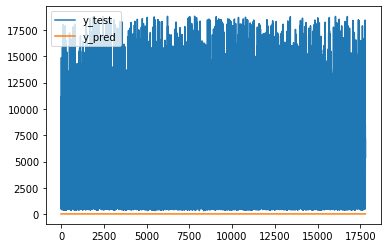

In [55]:
model_7_results_df.plot()

In [56]:
model_7_results_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,24.093748
std,3974.906564,0.000032
min,327.000000,24.093712
25%,942.000000,24.093716
50%,2389.000000,24.093716
75%,5392.000000,24.093718
max,18806.000000,24.093718


In [57]:
model_7_results_df.sum()

Total_delta = (model_7_results_df.sum()[1] - model_7_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_7_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_7_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_7_results_df.sum()[1],",.0f"))

Total delta is $ -69,525,944
Delta as % of total price is -99.39%
Total price of all diamonds in the test sample is 69,954,836
Total predicted price of all diamonds is 428,892


In [58]:
# Create neural network with 3 hidden layers that each contain the swish activation function

# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_8 = Sequential()

# First hidden layer
nn_8.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="swish")
)
# Second hidden layer
nn_8.add(Dense(units=hidden_nodes_layer2, activation="swish"))

# Third hidden layer
nn_8.add(Dense(units=hidden_nodes_layer2, activation="swish"))

# Output layer
nn_8.add(Dense(units=1, activation="linear"))

In [59]:
# Compile the model
nn_8.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_8 = nn_8.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1130/1130 [==============================] - 2s 2ms/step - loss: 14110344.0000 - mean_absolute_error: 2317.2937
Epoch 2/125
1130/1130 [==============================] - 3s 3ms/step - loss: 1264783.5000 - mean_absolute_error: 702.1767
Epoch 3/125
1130/1130 [==============================] - 2s 2ms/step - loss: 1028323.1250 - mean_absolute_error: 608.4445A: 1s - loss: 13
Epoch 4/125
1130/1130 [==============================] - 2s 2ms/step - loss: 930960.9375 - mean_absolute_error: 569.2193: 0s - loss: 769211.93
Epoch 5/125
1130/1130 [==============================] - 2s 2ms/step - loss: 858941.8750 - mean_absolute_error: 534.8190
Epoch 6/125
1130/1130 [==============================] - 3s 2ms/step - loss: 804055.6875 - mean_absolute_error: 508.6349
Epoch 7/125
1130/1130 [==============================] - 3s 2ms/step - loss: 749922.0625 - mean_absolute_error: 483.8840
Epoch 8/125
1130/1130 [==============================] - 2s 2ms/step - loss: 699536.7500 - mean_absolute_error

In [60]:
predicted_8 = nn_8.predict(X_test_scaled)
print(predicted_8.reshape(1,-1)[0])

[1088.874  4098.636  3500.6292 ... 3579.9973 5265.7573 7164.254 ]


In [61]:
model_8_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_8.reshape(1,-1)[0] })

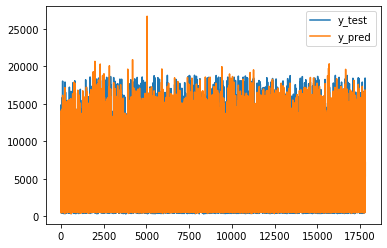

In [62]:
model_8_results_df.plot()

In [63]:
model_8_results_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,3953.630371
std,3974.906564,3956.170166
min,327.000000,350.575439
25%,942.000000,934.870483
50%,2389.000000,2428.280762
75%,5392.000000,5394.487305
max,18806.000000,26666.220703


In [64]:
model_8_results_df.sum()

Total_delta = (model_8_results_df.sum()[1] - model_8_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_8_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_8_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_8_results_df.sum()[1],",.0f"))

Total delta is $ 423,776
Delta as % of total price is 0.61%
Total price of all diamonds in the test sample is 69,954,836
Total predicted price of all diamonds is 70,378,612


In [65]:
# Create a neural network with 3 hidden layers with an elu activation function in each layer

# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_9 = Sequential()

# First hidden layer
nn_9.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="elu")
)
# Second hidden layer
nn_9.add(Dense(units=hidden_nodes_layer2, activation="elu"))

# Third hidden layer
nn_9.add(Dense(units=hidden_nodes_layer2, activation="elu"))

# Output layer
nn_9.add(Dense(units=1, activation="linear"))

In [66]:
# Compile the model
nn_9.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_9 = nn_9.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1130/1130 [==============================] - 4s 3ms/step - loss: 12097078.0000 - mean_absolute_error: 2146.9775
Epoch 2/125
1130/1130 [==============================] - 4s 3ms/step - loss: 1521932.8750 - mean_absolute_error: 860.2169
Epoch 3/125
1130/1130 [==============================] - 4s 4ms/step - loss: 1228843.3750 - mean_absolute_error: 752.2590
Epoch 4/125
1130/1130 [==============================] - 4s 3ms/step - loss: 1110110.0000 - mean_absolute_error: 693.8153
Epoch 5/125
1130/1130 [==============================] - 4s 3ms/step - loss: 1016699.8750 - mean_absolute_error: 644.2296
Epoch 6/125
1130/1130 [==============================] - 4s 3ms/step - loss: 933833.3750 - mean_absolute_error: 605.6789
Epoch 7/125
1130/1130 [==============================] - 4s 3ms/step - loss: 854980.3125 - mean_absolute_error: 571.8018
Epoch 8/125
1130/1130 [==============================] - 4s 3ms/step - loss: 780938.1875 - mean_absolute_error: 540.4538
Epoch 9/125
1130/1130 [==

In [67]:
predicted_9 = nn_9.predict(X_test_scaled)
print(predicted_9.reshape(1,-1)[0])

[1046.3131 3785.8394 3504.7788 ... 3945.6821 5163.372  7081.8433]


In [68]:
model_9_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_9.reshape(1,-1)[0] })

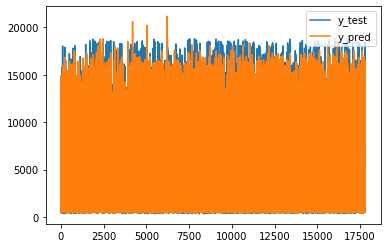

In [69]:
model_9_results_df.plot()

In [70]:
model_9_results_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,3954.550537
std,3974.906564,3951.362305
min,327.000000,340.111298
25%,942.000000,940.363953
50%,2389.000000,2444.086914
75%,5392.000000,5409.862305
max,18806.000000,21172.648438


In [71]:
model_9_results_df.sum()

Total_delta = (model_9_results_df.sum()[1] - model_9_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_9_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_9_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_9_results_df.sum()[1],",.0f"))

Total delta is $ 440,074
Delta as % of total price is 0.63%
Total price of all diamonds in the test sample is 69,954,836
Total predicted price of all diamonds is 70,394,910


In [72]:
# Define the model - deep neural net
number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_10 = Sequential()

# First hidden layer
nn_10.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="selu")
)
# Second hidden layer
nn_10.add(Dense(units=hidden_nodes_layer2, activation="selu"))

# Third hidden layer
nn_10.add(Dense(units=hidden_nodes_layer2, activation="selu"))

# Output layer
nn_10.add(Dense(units=1, activation="linear"))

In [73]:
# Compile the model
nn_10.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])
# Fit the model
model_10 = nn_10.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1130/1130 [==============================] - 2s 2ms/step - loss: 14755283.0000 - mean_absolute_error: 2438.9045
Epoch 2/125
1130/1130 [==============================] - 2s 2ms/step - loss: 1483380.3750 - mean_absolute_error: 792.7661A: 1s - loss: 1642178.8750 
Epoch 3/125
1130/1130 [==============================] - 2s 2ms/step - loss: 1184280.2500 - mean_absolute_error: 663.4034
Epoch 4/125
1130/1130 [==============================] - 2s 2ms/step - loss: 1058986.6250 - mean_absolute_error: 614.9014
Epoch 5/125
1130/1130 [==============================] - 2s 2ms/step - loss: 978733.7500 - mean_absolute_error: 588.4280TA: 1s - loss: 1082086.3
Epoch 6/125
1130/1130 [==============================] - 2s 2ms/step - loss: 920755.7500 - mean_absolute_error: 575.0095
Epoch 7/125
1130/1130 [==============================] - 2s 2ms/step - loss: 859278.0625 - mean_absolute_error: 560.9349
Epoch 8/125
1130/1130 [==============================] - 2s 2ms/step - loss: 794667.6250 - mean_

In [74]:
predicted_10 = nn_10.predict(X_test_scaled)
print(predicted_10.reshape(1,-1)[0])

[1145.1224 3597.6262 3647.3953 ... 3605.0217 5257.1973 7417.8438]


In [75]:
model_10_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_10.reshape(1,-1)[0] })

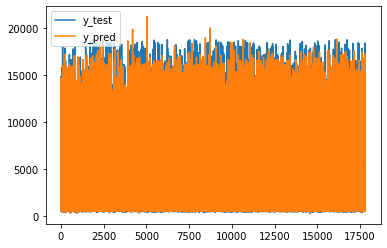

In [76]:
model_10_results_df.plot()

In [77]:
model_10_results_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,3952.253418
std,3974.906564,3965.728760
min,327.000000,191.574463
25%,942.000000,907.062622
50%,2389.000000,2428.980713
75%,5392.000000,5474.791992
max,18806.000000,21293.765625


In [78]:
model_10_results_df.sum()

Total_delta = (model_10_results_df.sum()[1] - model_10_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_10_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_10_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_10_results_df.sum()[1],",.0f"))

Total delta is $ 399,248
Delta as % of total price is 0.57%
Total price of all diamonds in the test sample is 69,954,836
Total predicted price of all diamonds is 70,354,084


In [79]:
# Create a neural network with 3 hidden layers that use the softplus activation function for each hidden layer
# Define the model - deep neural net

number_input_features = 26
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =16

nn_11 = Sequential()

# First hidden layer
nn_11.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="softplus")
)
# Second hidden layer
nn_11.add(Dense(units=hidden_nodes_layer2, activation="softplus"))

# Third hidden layer
nn_11.add(Dense(units=hidden_nodes_layer2, activation="softplus"))

# Output layer
nn_11.add(Dense(units=1, activation="linear"))

In [80]:
# Compile the model
nn_11.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

# Fit the model
model_11 = nn_11.fit(X_train_scaled, y_train, epochs=125)

Epoch 1/125
1130/1130 [==============================] - 2s 2ms/step - loss: 11465554.0000 - mean_absolute_error: 1874.4025
Epoch 2/125
1130/1130 [==============================] - 2s 2ms/step - loss: 1069700.6250 - mean_absolute_error: 549.4686
Epoch 3/125
1130/1130 [==============================] - 3s 3ms/step - loss: 958627.0000 - mean_absolute_error: 529.8148
Epoch 4/125
1130/1130 [==============================] - 3s 3ms/step - loss: 901149.1875 - mean_absolute_error: 512.2972
Epoch 5/125
1130/1130 [==============================] - 5s 4ms/step - loss: 854708.9375 - mean_absolute_error: 491.3735
Epoch 6/125
1130/1130 [==============================] - 3s 2ms/step - loss: 818795.6875 - mean_absolute_error: 472.7690
Epoch 7/125
1130/1130 [==============================] - 3s 2ms/step - loss: 781059.2500 - mean_absolute_error: 453.9765
Epoch 8/125
1130/1130 [==============================] - 2s 2ms/step - loss: 743690.6250 - mean_absolute_error: 438.5438
Epoch 9/125
1130/1130 [=====

In [81]:
predicted_11 = nn_11.predict(X_test_scaled)
print(predicted_11.reshape(1,-1)[0])

[1264.0051 3931.8274 3366.6829 ... 3781.7537 5206.636  7137.703 ]


In [82]:
model_11_results_df = pd.DataFrame({"y_test": y_test,
                         'y_pred': predicted_11.reshape(1,-1)[0] })

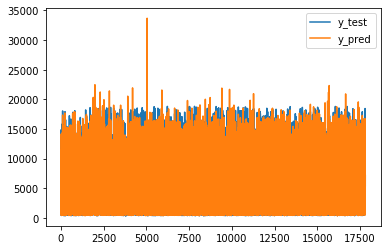

In [83]:
model_11_results_df.plot()

In [84]:
model_11_results_df.describe()

,y_test,y_pred
count,17801.000000,17801.000000
mean,3929.826190,3971.743164
std,3974.906564,3973.163330
min,327.000000,352.536682
25%,942.000000,935.892334
50%,2389.000000,2466.499512
75%,5392.000000,5447.107910
max,18806.000000,33656.519531


In [85]:
model_11_results_df.sum()

Total_delta = (model_11_results_df.sum()[1] - model_11_results_df.sum()[0] ) #/
print(f"Total delta is $", format(Total_delta, ",.0f"))
print("Delta as % of total price is", format(Total_delta/model_11_results_df.sum()[0] , ",.2%") )
print(f"Total price of all diamonds in the test sample is", format(model_11_results_df.sum()[0],",.0f") )
print(f"Total predicted price of all diamonds is", format(model_11_results_df.sum()[1],",.0f"))

Total delta is $ 746,111
Delta as % of total price is 1.07%
Total price of all diamonds in the test sample is 69,954,836
Total predicted price of all diamonds is 70,700,947


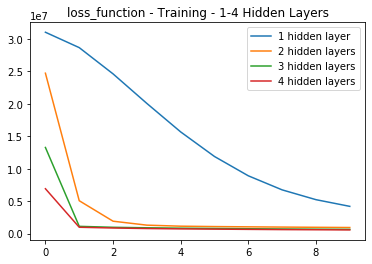

<Figure size 72000x7200 with 0 Axes>

In [86]:
# Plot the loss function of the training results for the two models
plt.plot(model_1.history["loss"][:10])
plt.plot(model_2.history["loss"][:10])
plt.plot(model_3.history["loss"][:10])
plt.plot(model_4.history["loss"][:10])
plt.title("loss_function - Training - 1-4 Hidden Layers")
plt.legend(["1 hidden layer", "2 hidden layers", "3 hidden layers", "4 hidden layers"])
plt.figure(figsize=(1000,100))
plt.show()

In [87]:
model_3_evaluation = nn_3.evaluate(X_test_scaled, y_test, verbose=0)


In [88]:
model_4_evaluation = nn_4.evaluate(X_test_scaled, y_test, verbose=0)


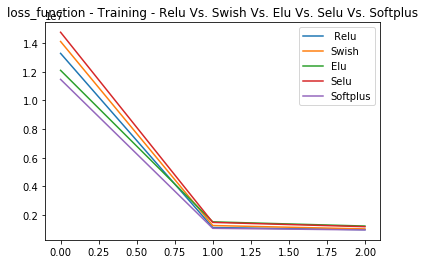

<Figure size 72000x7200 with 0 Axes>

In [89]:
plt.plot(model_3.history["loss"][:3])
plt.plot(model_8.history["loss"][:3])
plt.plot(model_9.history["loss"][:3])
plt.plot(model_10.history["loss"][:3])
plt.plot(model_11.history["loss"][:3])
plt.title("loss_function - Training - Relu Vs. Swish Vs. Elu Vs. Selu Vs. Softplus")
plt.legend([" Relu", "Swish", "Elu", "Selu", "Softplus"])
plt.figure(figsize=(1000,100))
plt.show()

In [90]:
model_8_evaluation = nn_8.evaluate(X_test_scaled, y_test, verbose=0)


In [91]:
model_9_evaluation = nn_9.evaluate(X_test_scaled, y_test, verbose=1)
print(model_9_evaluation)

557/557 [==============================] - 1s 1ms/step - loss: 332695.5938 - mean_absolute_error: 310.1769
[332695.59375, 310.17694091796875]


In [92]:
model_10_evaluation = nn_10.evaluate(X_test_scaled, y_test, verbose=0)


In [95]:
model_11_evaluation = nn_11.evaluate(X_test_scaled, y_test, verbose=0)
print(model_11_evaluation)

[383218.9375, 327.3377380371094]


In [94]:
model_summaries = {'3 Hidden Layers Relu': [f"{model_3_evaluation}"],
        '4 hidden layers Relu': [f"{model_4_evaluation}"],
        "Swish" : [f"{model_8_evaluation}"],
        "Elu" : [f"{model_9_evaluation}"],
        "Selu" : [f"{model_10_evaluation}"],
        "Softplus" : [f"{model_11_evaluation}"]
        }

model_summaries_df = pd.DataFrame (model_summaries, columns = ['3 Hidden Layers Relu','4 hidden layers Relu', "Swish", "Elu", "Selu", "Softplus"])
print(model_summaries_df)

                3 Hidden Layers Relu               4 hidden layers Relu  \
0  [375346.46875, 321.8931579589844]  [379872.03125, 321.6812438964844]   

                              Swish                                 Elu  \
0  [342719.96875, 314.089111328125]  [332695.59375, 310.17694091796875]   

                               Selu                          Softplus  
0  [329045.3125, 322.0150451660156]  [383218.9375, 327.3377380371094]  
